# kNN - Experimento variando K y tamaño de imagenes


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [ ]:
!cd .. && ./build.sh

## Explorando los datos

In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_orig = pd.read_csv("../data/train.csv")
df_orig.info()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [6]:
df_orig.sample(frac=1, random_state=2020)

def slice(n):
    df_train = df_orig.copy()[:n]
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    return X, y


### Experimento

In [31]:
import metnum
import pandas as pd

from scoring import metrics
from scoring import cross_validation as cv
from tqdm import tqdm

scoring_fns = {
    "accuracy":  metrics.accuracy_score,
    "recall":    metrics.recall_score,
    "precision": metrics.precision_score,
    "f1":        metrics.f1_score,
}

K_FOLD_VALUES = [2, 4, 6, 8, 10, 20]
X_SIZES = [500, 1000, 2500, 5000, 8000, 10000, 25000, 42000]
LABEL = "kNN_distance_pow"
#LABEL = "kNN_uniform+PCA"
#LABEL = "kNN_distance_pow+PCA"

rows = []
clf = metnum.KNNClassifier(4, "distance_pow")
for K in tqdm(K_FOLD_VALUES, "Ks"):
    for size in X_SIZES:
        X, y = slice(size)
        scores = cv.cross_validate_fns(clf, X, y, scoring_fns, K)

        # scores es un dict con las keys de scoring_fns, que son las
        # mismas que las columnas del dataframe.
        rows.append({
            **{
                "label": LABEL,
                "K": K,
                "sample_size": size,
            }, 
            **scores
        })

print("Creating DataFrame...")
df = pd.DataFrame(rows, columns=["label", "K", "sample_size", "accuracy", "recall", "precision", "f1"])

print("Finished!")

Ks: 100%|██████████| 6/6 [06:46<00:00, 67.81s/it]

Creating DataFrame...
Finished!


In [16]:
df.sort_values("accuracy", ascending=False)

,label,K,sample_size,accuracy,recall,precision,f1
7,kNN_distance_pow,8,5000,0.936200,0.935794,0.936637,0.934993
9,kNN_distance_pow,10,5000,0.936000,0.934970,0.936635,0.934606
5,kNN_distance_pow,6,5000,0.935974,0.934858,0.936509,0.934605
3,kNN_distance_pow,4,5000,0.931000,0.930022,0.931707,0.929763
1,kNN_distance_pow,2,5000,0.919800,0.918631,0.921082,0.918586
6,kNN_distance_pow,8,1000,0.869000,0.868079,0.870696,0.863363
4,kNN_distance_pow,6,1000,0.868474,0.863698,0.870586,0.860366
8,kNN_distance_pow,10,1000,0.868000,0.865728,0.871306,0.860721
2,kNN_distance_pow,4,1000,0.861000,0.858383,0.864633,0.856392
0,kNN_distance_pow,2,1000,0.844000,0.843112,0.848767,0.840253


(0.945, 0.98)

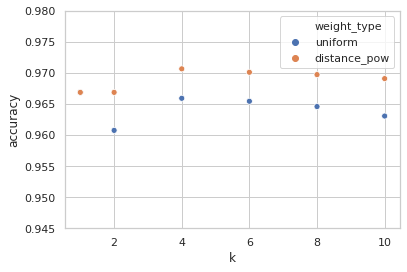

In [9]:
import seaborn as sns
sns.set(style="whitegrid")
plot = sns.scatterplot(
    data=df, x="k", y="accuracy", 
    hue="weight_type",
    legend="full",
)
plot.set_ylim(0.945, 0.98)

In [4]:
df.to_csv("data/knn/variaciones/knn_distance_pow.csv", index=False)

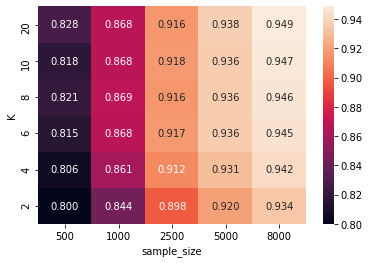

In [32]:
import seaborn as sns
df_pivot = df.pivot("K", "sample_size", "accuracy")
ax = sns.heatmap(data=df_pivot, annot=True, fmt=".3f")
ax.invert_yaxis()

In [ ]:
## concluimos que distance_pow es el mejor
## TODO: graficar cosas